In [117]:
import numpy as np 
import pandas as pd

In [118]:
base_path = "NIAPU/NIAPU/"

In [119]:
df_nebit_features = pd.read_csv(base_path + "src/nedbit_features_large", sep=",")
df_nebit_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg00394221_FCRL1,1,3374,1,0.911100,2228.745,0.341959,0.199177
1,cg00755661_CTTNBP2NL,1,2518,1,0.887059,2353.749,0.400209,0.199560
2,cg01717331_MED8,1,3036,1,0.867761,2442.949,0.516228,0.197366
3,cg01833436_SDCCAG8,1,5160,1,0.616319,3207.106,1.923066,0.198681
4,cg01833436_AKT3,1,5156,1,0.616738,3210.124,1.921631,0.198462
...,...,...,...,...,...,...,...,...
11753,cg18824330_UPF1,0,2035,2,1.962167,1946.779,0.028815,0.199438
11754,cg10508579_ARHGEF4,0,2804,2,1.951258,2122.385,0.048449,0.199599
11755,cg24706032_DLG4.1,0,95,2,1.982831,1202.240,0.009117,0.048314
11756,cg26123256_UCN,0,28,2,1.975399,911.336,0.023628,0.021059


In [120]:
nebit_features = df_nebit_features.iloc[:, 3:]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.911100,2228.745,0.341959,0.199177
1,1,0.887059,2353.749,0.400209,0.199560
2,1,0.867761,2442.949,0.516228,0.197366
3,1,0.616319,3207.106,1.923066,0.198681
4,1,0.616738,3210.124,1.921631,0.198462
...,...,...,...,...,...
11753,2,1.962167,1946.779,0.028815,0.199438
11754,2,1.951258,2122.385,0.048449,0.199599
11755,2,1.982831,1202.240,0.009117,0.048314
11756,2,1.975399,911.336,0.023628,0.021059


In [121]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_features["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

11758 (11758, 1)


array([[ 0.50094523],
       [ 0.67579985],
       [ 0.80057211],
       ...,
       [-0.93492189],
       [-1.34183612],
       [ 0.35396435]])

In [122]:
nebit_features["NetShort"] = norm_netshort
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.911100,0.500945,0.341959,0.199177
1,1,0.887059,0.675800,0.400209,0.199560
2,1,0.867761,0.800572,0.516228,0.197366
3,1,0.616319,1.869469,1.923066,0.198681
4,1,0.616738,1.873690,1.921631,0.198462
...,...,...,...,...,...
11753,2,1.962167,0.106533,0.028815,0.199438
11754,2,1.951258,0.352170,0.048449,0.199599
11755,2,1.982831,-0.934922,0.009117,0.048314
11756,2,1.975399,-1.341836,0.023628,0.021059


In [123]:
df_apu_labels = pd.read_csv(base_path + "src/output_gene_ranking", sep=",", header=None)
df_apu_labels

,0
0,cg00394221_FCRL1 0.815926 1
1,cg00755661_CTTNBP2NL 0.815686 1
2,cg01717331_MED8 0.816425 1
3,cg01833436_SDCCAG8 0.819904 1
4,cg01833436_AKT3 0.819908 1
...,...
11753,cg18824330_UPF1 0.002452 3
11754,cg10508579_ARHGEF4 0.004586 2
11755,cg24706032_DLG4.1 -0.606471 5
11756,cg26123256_UCN -0.608390 5


In [124]:
l_name = list()
l_labels = list()
for item in df_apu_labels.iterrows():
    #print(item[1].values[0])
    row = item[1].values[0].split(" ")
    l_name.append(row[0])
    l_labels.append(row[2])

df_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])
df_labels

,feature_name,labels
0,cg00394221_FCRL1,1
1,cg00755661_CTTNBP2NL,1
2,cg01717331_MED8,1
3,cg01833436_SDCCAG8,1
4,cg01833436_AKT3,1
...,...,...
11753,cg18824330_UPF1,3
11754,cg10508579_ARHGEF4,2
11755,cg24706032_DLG4.1,5
11756,cg26123256_UCN,5


In [125]:
labels = df_labels["labels"].tolist()

In [126]:
import umap

n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_features)

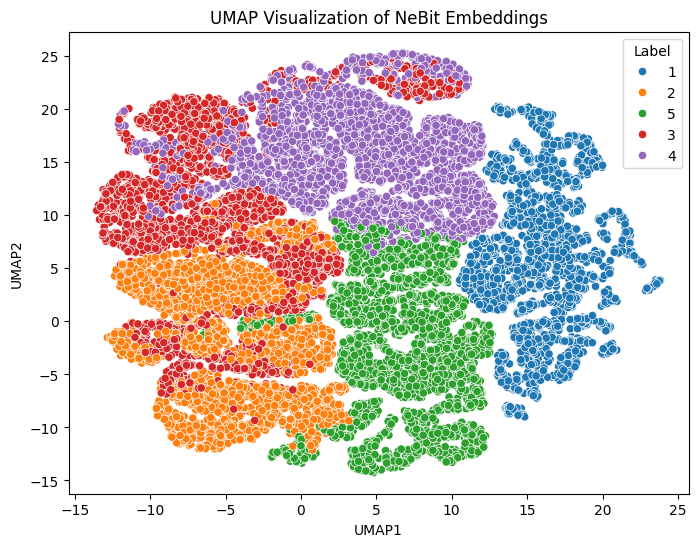

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": embeddings[:, 0], "UMAP2": embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeBit Embeddings")
plt.savefig(base_path + "umap_nebit_features.pdf")
plt.show()

In [128]:
df_merged_signals = pd.read_csv("../nanodiag_datasets/GSE175758/merged_signals.csv", sep="\t", engine="python")
df_merged_signals

,cg23954847_TFE3,cg00000957_NPHP4,cg00001349_MAEL,cg00001364_PROX1,cg00001446_ELOVL1,cg00001534_FAF1,cg00001583_NR5A2,cg00002028_PINK1,cg00002028_PINK1.1,cg00002593_TAS1R3,...,ch.22.533187F_HMOX1,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10
0,0.864672,0.919098,0.931214,0.825985,0.841873,0.905513,0.902962,0.052570,0.052570,0.831665,...,0.042048,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464
1,0.732438,0.884181,0.862162,0.758616,0.782469,0.853061,0.324640,0.091551,0.091551,0.797655,...,0.062322,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508
2,0.870964,0.896988,0.917439,0.798168,0.788342,0.883873,0.064378,0.041799,0.041799,0.831371,...,0.064128,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633
3,0.770894,0.896535,0.923548,0.781703,0.810133,0.898413,0.146580,0.061871,0.061871,0.788763,...,0.051624,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391
4,0.793325,0.900545,0.890331,0.753394,0.816442,0.874389,0.283989,0.044948,0.044948,0.789155,...,0.029399,0.112743,0.047210,0.025311,0.120706,0.158879,0.033180,0.039391,0.030883,0.108496
5,0.771238,0.881966,0.885884,0.706935,0.789394,0.844779,0.052274,0.058234,0.058234,0.768430,...,0.050518,0.144294,0.078152,0.046610,0.170648,0.172923,0.054839,0.068701,0.098243,0.220538
6,0.818622,0.858326,0.837925,0.785126,0.798059,0.887452,0.191977,0.062295,0.062295,0.477000,...,0.068426,0.181990,0.159486,0.043905,0.184506,0.147676,0.056958,0.065455,0.091866,0.168706
7,0.719042,0.888057,0.864124,0.758313,0.781905,0.884818,0.390451,0.088711,0.088711,0.825365,...,0.068621,0.154173,0.102731,0.059434,0.186476,0.138332,0.082228,0.073743,0.098911,0.185174
8,0.775340,0.892561,0.908382,0.771167,0.835124,0.877090,0.669288,0.088306,0.088306,0.788113,...,0.052823,0.139850,0.063330,0.047713,0.147007,0.168616,0.062604,0.070394,0.072000,0.148210
9,0.430085,0.882614,0.871273,0.797262,0.808716,0.878163,0.145391,0.072168,0.072168,0.823876,...,0.070245,0.171744,0.099462,0.066413,0.207633,0.188526,0.064079,0.077805,0.120990,0.165222


In [129]:
feature_names = df_labels["feature_name"].tolist()
feature_names[:20]

['cg00394221_FCRL1',
 'cg00755661_CTTNBP2NL',
 'cg01717331_MED8',
 'cg01833436_SDCCAG8',
 'cg01833436_AKT3',
 'cg01943585_CTTNBP2NL',
 'cg02337836_GSTM2',
 'cg03070194_GSTM2',
 'cg03942855_GSTM2',
 'cg04860852_KIF21B',
 'cg07010314_KIF21B',
 'cg07299462_MED8',
 'cg08142344_GSTM2',
 'cg09172079_MED8',
 'cg09340639_FCRL1',
 'cg09478478_CD1E',
 'cg09664215_CD1E',
 'cg10548277_MED8',
 'cg11073926_MED8',
 'cg12647497_GSTM2']

In [130]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

,cg00394221_FCRL1,cg00755661_CTTNBP2NL,cg01717331_MED8,cg01833436_SDCCAG8,cg01833436_AKT3,cg01943585_CTTNBP2NL,cg02337836_GSTM2,cg03070194_GSTM2,cg03942855_GSTM2,cg04860852_KIF21B,...,cg19659045_SAP30L.1,cg20577878_PDP2,cg09456493_PPM1L,cg22369037_NFKBIL1,cg06130144_MEN1.2,cg18824330_UPF1,cg10508579_ARHGEF4,cg24706032_DLG4.1,cg26123256_UCN,cg02938045_ABCC11
0,0.884223,0.831418,0.025495,0.872817,0.872817,0.897189,0.038162,0.045866,0.092978,0.095286,...,0.041882,0.053767,0.812447,0.959007,0.046887,0.860154,0.873239,0.010095,0.750738,0.902795
1,0.854487,0.778697,0.039160,0.789144,0.789144,0.821908,0.052621,0.056118,0.278337,0.142490,...,0.059740,0.059434,0.783309,0.906079,0.069705,0.810041,0.834634,0.035600,0.740675,0.852568
2,0.893978,0.836100,0.022026,0.889303,0.889303,0.888078,0.043235,0.045216,0.242298,0.089058,...,0.051679,0.064146,0.826407,0.877021,0.057965,0.865714,0.877311,0.022563,0.651773,0.871461
3,0.877296,0.810414,0.024142,0.840657,0.840657,0.883874,0.039696,0.043544,0.078493,0.087485,...,0.063380,0.059468,0.772897,0.928449,0.047859,0.872203,0.891497,0.024424,0.823265,0.880545
4,0.881579,0.807439,0.018627,0.844308,0.844308,0.865828,0.021516,0.042022,0.044451,0.088076,...,0.042512,0.049891,0.760669,0.899597,0.043710,0.807155,0.899796,0.020408,0.399325,0.863897
5,0.910560,0.839523,0.045650,0.841471,0.841471,0.890614,0.043223,0.055567,0.069631,0.079070,...,0.042313,0.058174,0.806994,0.874234,0.064217,0.817530,0.846901,0.026074,0.267070,0.824796
6,0.858944,0.825842,0.041854,0.849658,0.849658,0.865500,0.038833,0.065221,0.077348,0.082567,...,0.064819,0.065983,0.793437,0.901281,0.058690,0.859686,0.874612,0.035616,0.369305,0.872544
7,0.851166,0.863688,0.024024,0.833542,0.833542,0.871604,0.034344,0.043081,0.080552,0.079085,...,0.041090,0.059853,0.765224,0.919642,0.051473,0.809050,0.865088,0.019852,0.838102,0.865138
8,0.897877,0.844439,0.031760,0.833725,0.833725,0.876568,0.041404,0.042821,0.092820,0.091533,...,0.053528,0.055147,0.792721,0.906934,0.052879,0.830584,0.871686,0.019875,0.871258,0.860378
9,0.884387,0.817666,0.039955,0.834115,0.834115,0.833997,0.042473,0.060102,0.188829,0.100172,...,0.043945,0.081555,0.809027,0.827312,0.064969,0.816767,0.882158,0.045528,0.813358,0.864937


In [131]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
cg00755661_CTTNBP2NL,0.831418,0.778697,0.836100,0.810414,0.807439,0.839523,0.825842,0.863688,0.844439,0.817666,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
cg01717331_MED8,0.025495,0.039160,0.022026,0.024142,0.018627,0.045650,0.041854,0.024024,0.031760,0.039955,...,0.037703,0.019371,0.041606,0.031207,0.032731,0.029119,0.020335,0.018954,0.034177,0.031835
cg01833436_SDCCAG8,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
cg01833436_AKT3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg18824330_UPF1,0.860154,0.810041,0.865714,0.872203,0.807155,0.817530,0.859686,0.809050,0.830584,0.816767,...,0.797372,0.810298,0.730072,0.810067,0.809147,0.725320,0.722015,0.786012,0.760330,0.723507
cg10508579_ARHGEF4,0.873239,0.834634,0.877311,0.891497,0.899796,0.846901,0.874612,0.865088,0.871686,0.882158,...,0.854766,0.806021,0.708926,0.889080,0.809485,0.794104,0.683964,0.762189,0.733312,0.784492
cg24706032_DLG4.1,0.010095,0.035600,0.022563,0.024424,0.020408,0.026074,0.035616,0.019852,0.019875,0.045528,...,0.043841,0.010798,0.040415,0.028520,0.024721,0.014722,0.018138,0.015332,0.036240,0.031462
cg26123256_UCN,0.750738,0.740675,0.651773,0.823265,0.399325,0.267070,0.369305,0.838102,0.871258,0.813358,...,0.833963,0.810189,0.790091,0.838911,0.735139,0.628372,0.753608,0.849468,0.642694,0.794550


In [132]:
dnam_signals_transpose = dnam_signals_transpose.reset_index()
dnam_signals_transpose

,index,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,cg00755661_CTTNBP2NL,0.831418,0.778697,0.836100,0.810414,0.807439,0.839523,0.825842,0.863688,0.844439,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,cg01717331_MED8,0.025495,0.039160,0.022026,0.024142,0.018627,0.045650,0.041854,0.024024,0.031760,...,0.037703,0.019371,0.041606,0.031207,0.032731,0.029119,0.020335,0.018954,0.034177,0.031835
3,cg01833436_SDCCAG8,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,cg01833436_AKT3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11753,cg18824330_UPF1,0.860154,0.810041,0.865714,0.872203,0.807155,0.817530,0.859686,0.809050,0.830584,...,0.797372,0.810298,0.730072,0.810067,0.809147,0.725320,0.722015,0.786012,0.760330,0.723507
11754,cg10508579_ARHGEF4,0.873239,0.834634,0.877311,0.891497,0.899796,0.846901,0.874612,0.865088,0.871686,...,0.854766,0.806021,0.708926,0.889080,0.809485,0.794104,0.683964,0.762189,0.733312,0.784492
11755,cg24706032_DLG4.1,0.010095,0.035600,0.022563,0.024424,0.020408,0.026074,0.035616,0.019852,0.019875,...,0.043841,0.010798,0.040415,0.028520,0.024721,0.014722,0.018138,0.015332,0.036240,0.031462
11756,cg26123256_UCN,0.750738,0.740675,0.651773,0.823265,0.399325,0.267070,0.369305,0.838102,0.871258,...,0.833963,0.810189,0.790091,0.838911,0.735139,0.628372,0.753608,0.849468,0.642694,0.794550


In [133]:
dnam_features = dnam_signals_transpose.iloc[:, 1:]
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.831418,0.778697,0.836100,0.810414,0.807439,0.839523,0.825842,0.863688,0.844439,0.817666,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,0.025495,0.039160,0.022026,0.024142,0.018627,0.045650,0.041854,0.024024,0.031760,0.039955,...,0.037703,0.019371,0.041606,0.031207,0.032731,0.029119,0.020335,0.018954,0.034177,0.031835
3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11753,0.860154,0.810041,0.865714,0.872203,0.807155,0.817530,0.859686,0.809050,0.830584,0.816767,...,0.797372,0.810298,0.730072,0.810067,0.809147,0.725320,0.722015,0.786012,0.760330,0.723507
11754,0.873239,0.834634,0.877311,0.891497,0.899796,0.846901,0.874612,0.865088,0.871686,0.882158,...,0.854766,0.806021,0.708926,0.889080,0.809485,0.794104,0.683964,0.762189,0.733312,0.784492
11755,0.010095,0.035600,0.022563,0.024424,0.020408,0.026074,0.035616,0.019852,0.019875,0.045528,...,0.043841,0.010798,0.040415,0.028520,0.024721,0.014722,0.018138,0.015332,0.036240,0.031462
11756,0.750738,0.740675,0.651773,0.823265,0.399325,0.267070,0.369305,0.838102,0.871258,0.813358,...,0.833963,0.810189,0.790091,0.838911,0.735139,0.628372,0.753608,0.849468,0.642694,0.794550


In [134]:
n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(dnam_features)

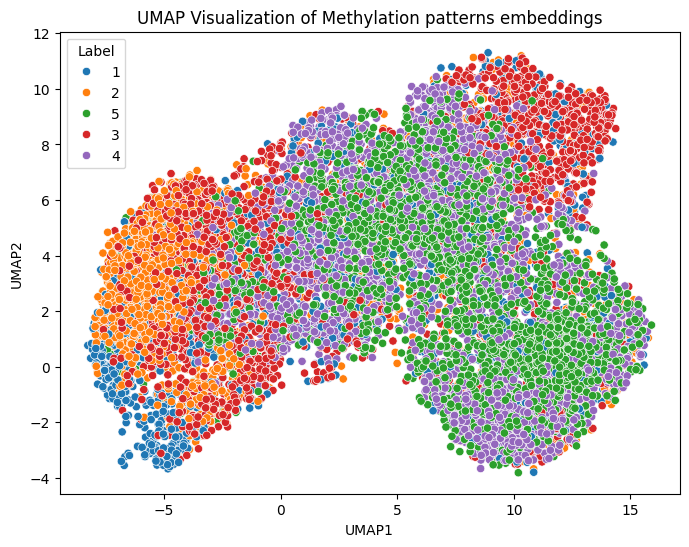

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": dnam_embeddings[:, 0], "UMAP2": dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Methylation patterns embeddings")
plt.savefig(base_path + "umap_dnam_features.pdf")
plt.show()

In [136]:
nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,24,25,26,27,28,29,30,31,32,33
0,1,0.911100,0.500945,0.341959,0.199177,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,1,0.887059,0.675800,0.400209,0.199560,0.831418,0.778697,0.836100,0.810414,0.807439,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,1,0.867761,0.800572,0.516228,0.197366,0.025495,0.039160,0.022026,0.024142,0.018627,...,0.037703,0.019371,0.041606,0.031207,0.032731,0.029119,0.020335,0.018954,0.034177,0.031835
3,1,0.616319,1.869469,1.923066,0.198681,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,1,0.616738,1.873690,1.921631,0.198462,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11753,2,1.962167,0.106533,0.028815,0.199438,0.860154,0.810041,0.865714,0.872203,0.807155,...,0.797372,0.810298,0.730072,0.810067,0.809147,0.725320,0.722015,0.786012,0.760330,0.723507
11754,2,1.951258,0.352170,0.048449,0.199599,0.873239,0.834634,0.877311,0.891497,0.899796,...,0.854766,0.806021,0.708926,0.889080,0.809485,0.794104,0.683964,0.762189,0.733312,0.784492
11755,2,1.982831,-0.934922,0.009117,0.048314,0.010095,0.035600,0.022563,0.024424,0.020408,...,0.043841,0.010798,0.040415,0.028520,0.024721,0.014722,0.018138,0.015332,0.036240,0.031462
11756,2,1.975399,-1.341836,0.023628,0.021059,0.750738,0.740675,0.651773,0.823265,0.399325,...,0.833963,0.810189,0.790091,0.838911,0.735139,0.628372,0.753608,0.849468,0.642694,0.794550


In [160]:
n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features)

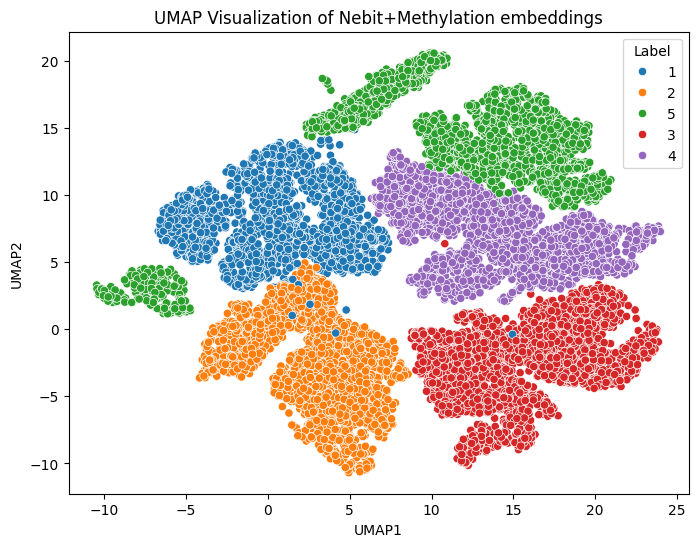

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Nebit+Methylation embeddings")
plt.savefig(base_path + "umap_nebit_dnam_features.pdf")
plt.show()

In [139]:
df_nebit_dnam_features = nebit_dnam_features

In [140]:
df_nebit_dnam_features["labels"] = labels

In [142]:
df_nebit_dnam_features.to_csv("../nanodiag_datasets/GSE175758/naipu_processed_files/df_nebit_dnam_features.csv", 
                              sep="\t", header=None, index=None)



In [149]:
feature_gene_names = dnam_signals_transpose.iloc[0:, 0]
feature_gene_names

0            cg00394221_FCRL1
1        cg00755661_CTTNBP2NL
2             cg01717331_MED8
3          cg01833436_SDCCAG8
4             cg01833436_AKT3
                 ...         
11753         cg18824330_UPF1
11754      cg10508579_ARHGEF4
11755       cg24706032_DLG4.1
11756          cg26123256_UCN
11757       cg02938045_ABCC11
Name: index, Length: 11758, dtype: object

In [154]:
df_feature_names = pd.DataFrame(feature_gene_names)
df_feature_names.to_csv("../nanodiag_datasets/GSE175758/naipu_processed_files/df_feature_names.csv", 
                              sep="\t", index=None)
df_feature_names

,index
0,cg00394221_FCRL1
1,cg00755661_CTTNBP2NL
2,cg01717331_MED8
3,cg01833436_SDCCAG8
4,cg01833436_AKT3
...,...
11753,cg18824330_UPF1
11754,cg10508579_ARHGEF4
11755,cg24706032_DLG4.1
11756,cg26123256_UCN
